# SEIR model with Input = [1500,  1,0, 0]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import griddata
from datetime import datetime
from scipy import stats


In [3]:
θ = np.load('theta_SEIR.npy')
tols = np.load('tols_SEIR.npy')

/home/emma/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


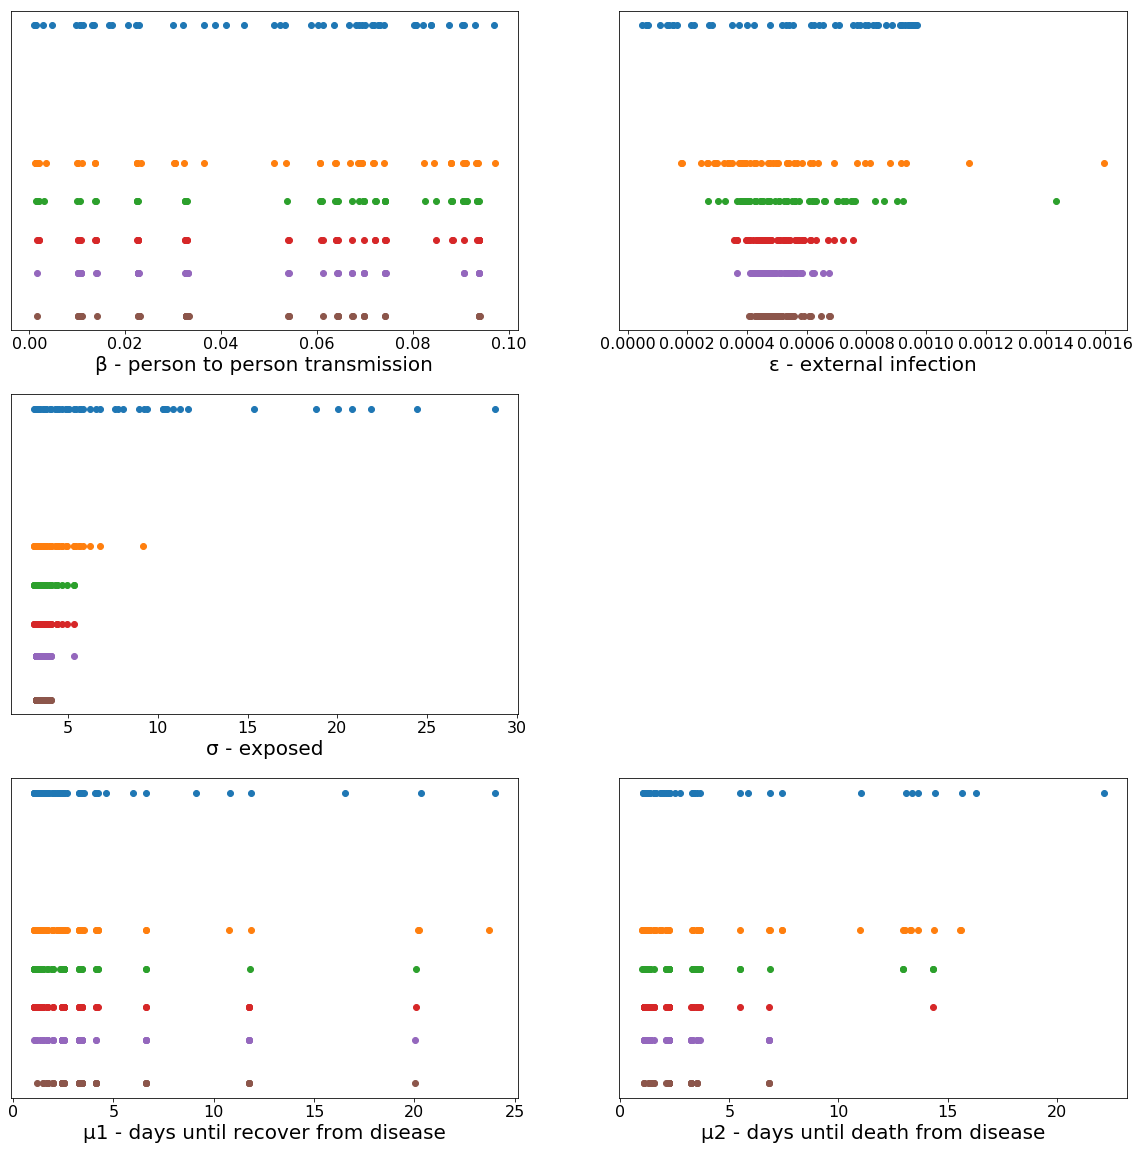

In [5]:
plt.figure(figsize = (20,20))
tol = 6
for i in range(6):
    plt.subplot(3,2,1)
    plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
    plt.xlabel('β - person to person transmission', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)
    
    plt.subplot(3,2,2)
    plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
    plt.xlabel('ɛ - external infection', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,3)
    plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
    plt.xlabel('σ - exposed', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,5)
    plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)

    plt.subplot(3,2,6)
    plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
    plt.xlabel('μ2 - days until death from disease', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)
    
#     tol -=1

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 10 Text xticklabel objects>)

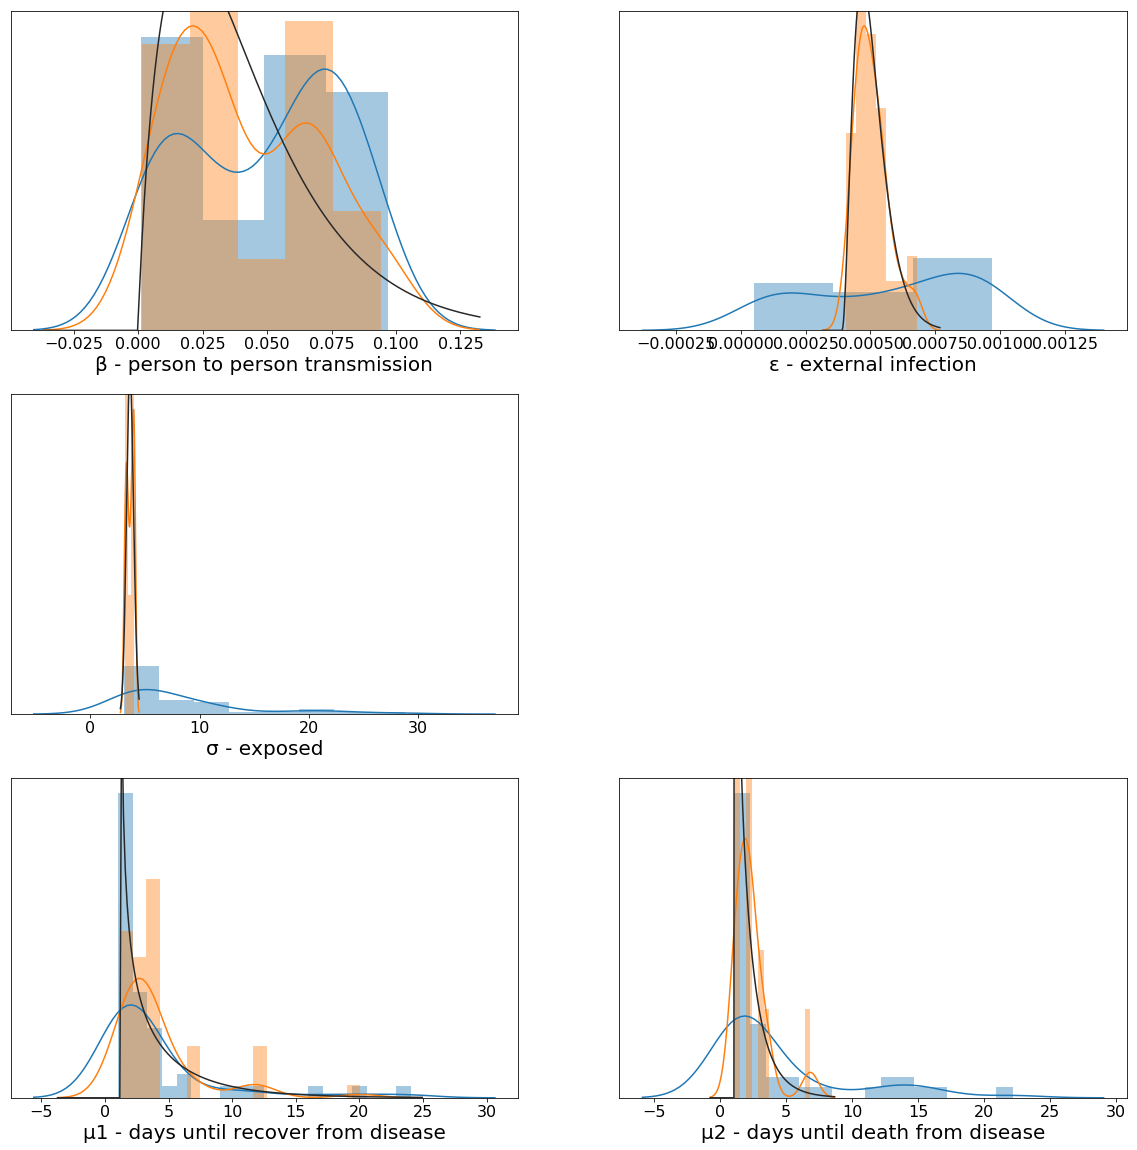

In [8]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
#     plt.plot(θ[i][:,0], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,0],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,0],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('β - person to person transmission', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,2)
#     plt.plot(θ[i][:,1], tols[i]*np.ones(50), 'o' )
sns.distplot(θ[0][:,1],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,1],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('ɛ - external infection', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,3)
#     plt.plot([1/a for a in θ[i][:,2]], tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,2]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,2]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('σ - exposed', fontsize = 20)
plt.yticks([])
plt.xticks(fontsize = 16)

plt.subplot(3,2,5)
sns.distplot([1/a for a in θ[0][:,3]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,3]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.plot([1/b for b in θ[i][:,3]] , tols[i]*np.ones(50), 'o' )
plt.xlabel('μ1 - days until recover from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

plt.subplot(3,2,6)
#     plt.plot([1/b for b in θ[i][:,4]] , tols[i]*np.ones(50), 'o' )
sns.distplot([1/a for a in θ[0][:,4]],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot([1/a for a in θ[5][:,4]],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.xlabel('μ2 - days until death from disease', fontsize = 20)
plt.yticks([])        
plt.xticks(fontsize = 16)

## Contour Plot of Joint Distribution 

major/minor axes that are parallel/perpendicular to the x-axis --> independent 

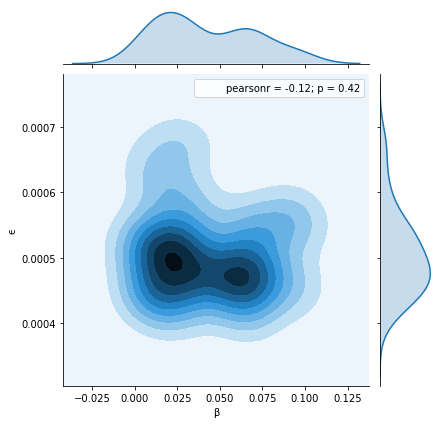

In [9]:
d = {'β': θ[5][:,0], 'ϵ': θ[5][:,1], 'σ': θ[5][:,2], 'μ1': θ[5][:,3], 'μ2': θ[5][:,4]}
df = pd.DataFrame(data = d)
sns.jointplot(x="β", y="ϵ", data=df, kind="kde"); 

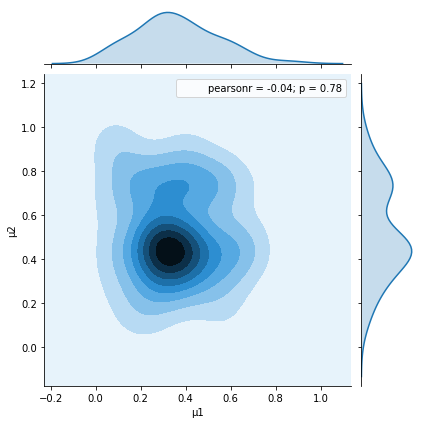

In [11]:
d = {'β': θ[5][:,0], 'ϵ': θ[5][:,1], 'σ': θ[5][:,2], 'μ1': θ[5][:,3], 'μ2': θ[5][:,4]}
df = pd.DataFrame(data = d)
sns.jointplot(x="μ1", y="μ2", data=df, kind="kde"); 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/emma/.local/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


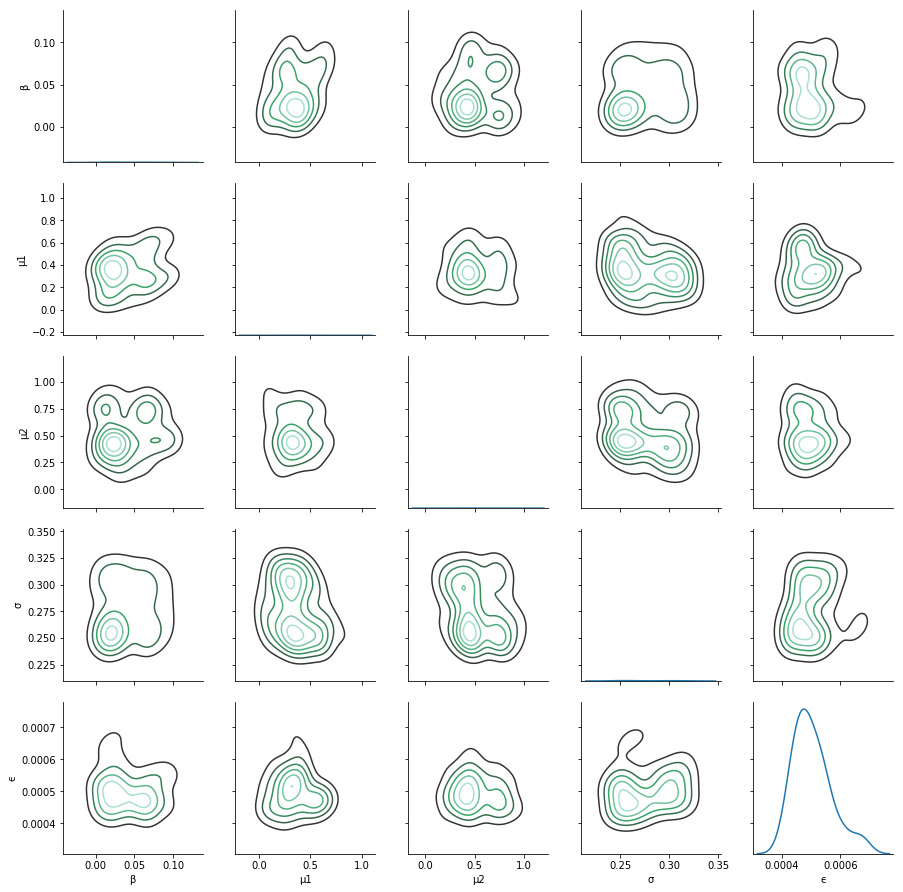

In [10]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6); #pretty much all independent 

# Draw from posterior -- plots of predictions 

In [12]:
#####################################################################################
############################### DATASETS ############################################
#####################################################################################

Data_F04=pd.read_csv("../Case_data/2004_F_cases.csv",sep = ',', header = 0)
############################# Spacing ##############################################
date_format = "%d/%m/%y"


def Spacing(dataset):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days) 
    record = [int(a - record[0]) for a in record]
    return record

Rec_F04=Spacing(Data_F04)

In [13]:
Rec_F04
# Input_H

[0, 14, 16, 19, 26, 29, 34, 35, 36, 39, 40, 41, 42, 43, 45, 53, 54, 55, 56, 57]

In [15]:
μ1 = 1/21 #14 days infectious
μ2 = 1/5 #5 days (14 - 9 days)
σ =1/5 #5 days exposed
ω=1/9 # 9 days until emitted to hospital
capT = 10000
γ = 1/(80*365)
Input_H = [1500,1,0,0]

In [41]:
def gillespieSEIR(initial, beta, mu1,mu2, sigma, epsilon,  max_time):
    event_time = []
    pop = []
    N = sum(initial)
    pop.append(initial)
    event_time.append(0)
    times = 0
    ind = 0
    cuminf = []
    cuminf.append(1)
    events = []
    while times <max_time and (pop[ind][1]+pop[ind][2]>0):
        state = np.zeros(shape= (4,4))
        
        ####################################################################################
        #################################### EVENTS ########################################
        ####################################################################################
        
        
        R_se = beta*(pop[ind][0])*(pop[ind][2])/N + epsilon*pop[ind][0] 
        state[:,0] = [-1, 1, 0, 0]
        
        R_ei = sigma*pop[ind][1]
        state[:,1] = [0, -1, 1, 0]
        
#         R_ih = omega*pop[ind][2]
#         state[:,2] = [0, 0, -1, 1, 0]
        
        R_ir = mu2*pop[ind][2]
        state[:,2] = [0,0,-1,1]
        
#         R_hr = mort*mu2*pop[ind][3]
#         state[:,4] = [0,0,0,-1,1]

        R_is = mu1*pop[ind][2]
        state[:,3] = [1,0,-1,0]

#         R_hs = (1-mort)*mu2*pop[ind][3]
#         state[:,6] = [1,0,0,-1,0]
        
        rate = [R_se, R_ei,  R_ir, R_is]

        Rtotal = sum(rate)
        delta_t= -np.log(np.random.uniform(0,1))/Rtotal
        P = np.random.uniform(0,1)*Rtotal
        times =times+ delta_t
        event = np.min(np.where(P<=np.cumsum(rate)))
#         print(event)
        
        events.append(event)
        event_time.append(times)
        pop.append(pop[ind]+state[:,event])
        
#         total_inf = sum(cuminf)
        if event == 1:
            cuminf.append(1 + cuminf[ind] )
        else:
            cuminf.append(0 +cuminf[ind])
        ind=ind+1
#         print(pop[ind][:5])
        N = sum(pop[ind][:5])
#         print(N)
    return event_time, np.array(pop), events, cuminf

In [25]:
parameters = [Input_H, μ1, μ2, σ, ω, 1, capT]
r_β = np.random.randint(0, 49)
r_ϵ = np.random.randint(0,49)
r_σ = np.random.randint(0,49)
r_μ1 = np.random.randint(0,49)
r_μ2 = np.random.randint(0,49)
betas = θ[5][:,0]
eps = θ[5][:,1]
sigmas = θ[5][:,2]
mus1 = θ[5][:,3]
mus2 = θ[5][:,4]

In [28]:
 Data_F04['CumsumInf'].values
#     initial, beta, mu1,mu2, sigma, omega, alpha, epsilon, mort,  max_time)

array([ 1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 14, 17, 26, 27, 28, 31, 33,
       34, 35, 36])

In [121]:
timing = []
cumulative = []
for k in range(1000):
    r_β = np.random.randint(0, 49)
    r_ϵ = np.random.randint(0,49)
    r_σ = np.random.randint(0,49)
    r_μ1 = np.random.randint(0,49)
    r_μ2 = np.random.randint(0,49)
    M=gillespieSEIR(parameters[0], betas[r_β], mus1[r_μ1],mus2[r_μ2],
                          sigmas[r_σ],eps[r_ϵ],  parameters[6])
    time = [] #make results of M a step function
    cuminf = [] #steps
    for ind, x in enumerate(M[0]):
        if ind < len(M[0])-1:
            time.append((M[0][ind], M[0][ind+1]))
            cuminf.append((M[3][ind], M[3][ind]))
    time = np.array(time).flatten()
    cuminf = np.array(cuminf).flatten()
    max_inf = max(cuminf)
    max_time = math.ceil(max(time))
    #     print(max_inf, max_time, βt, ɛt)


    summary_time = Rec_F04
    #         print(summary_time, max(summary_time[0]), max_time)
    summary_cum = Data_F04['CumsumInf'].values
    if max_time> max(summary_time):
        length1 =  np.arange(max(summary_time), max_time +1, 1)
        summary_time = np.append(summary_time, length1)
    #         print(summary_time, len( length1))
        summary_cum = np.append(summary_cum, max( Data_F04['CumsumInf'].values)*np.ones(len(length1 )))
    #         print(summary_cum)
    if max_time < max(summary_time):
        length2 = np.arange(max_time, max(summary_time)+1, 1)
        time = np.append(time,length2)
        cuminf = np.append(cuminf, max_inf*np.ones(len(length2)))

    inter_t = np.arange(0, max(summary_time) +1 , 1) #interpolate to daily steps
    inter_cum = np.interp(inter_t, time,cuminf) #daily steps
    timing.append(inter_t)
    cumulative.append(inter_cum)
    #         print(summary_time, summary_cum)
#     print(np.linalg.norm(summary_cum-inter_cum[summary_time]),  betas[r_β], mus1[r_μ1],mus2[r_μ2],
#                           sigmas[r_σ],eps[r_ϵ])
    

(0, 100)

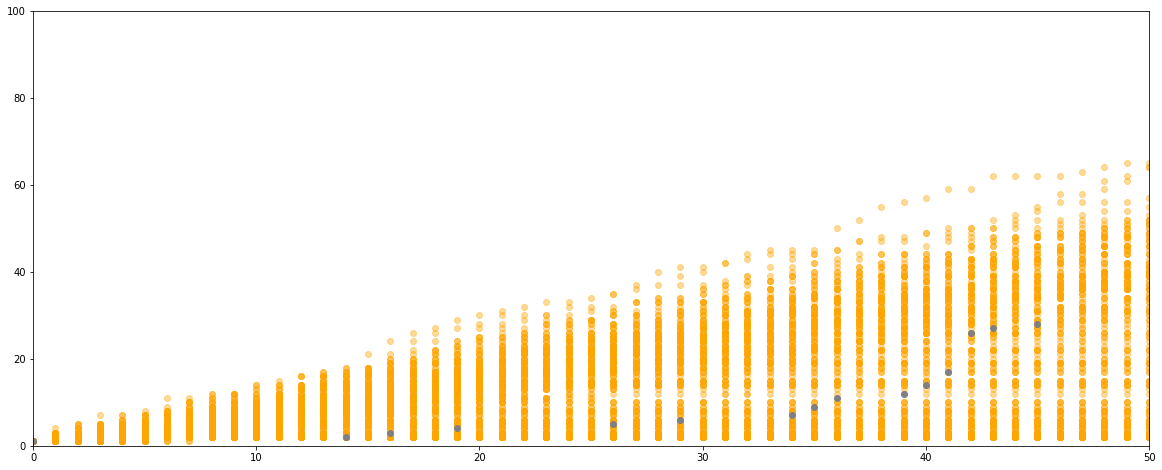

In [122]:
plt.figure(figsize = (20,8))
for j in range(200):
    plt.plot(timing[j], cumulative[j], 'o', color = 'orange', alpha = 0.4)

plt.plot(summary_time, summary_cum, 'o', color = 'grey')
plt.xlim([0,50])
plt.ylim([0,100])

In [123]:
sun_cum = np.zeros(57)
for k in range(57):
    for j in range(200):
        if timing[j][-1]<k:
            sun_cum[k] +=0
        else:
            sun_cum[k] += cumulative[j][k]

In [124]:
cumulative = np.array(cumulative)

In [125]:
mat = np.zeros(shape=(200, 58))

In [126]:
for k in range(200):
    mat[k,:] = cumulative[k][:58]

In [173]:
np.mean(mat, axis = 0)
import matplotlib.lines as mlines

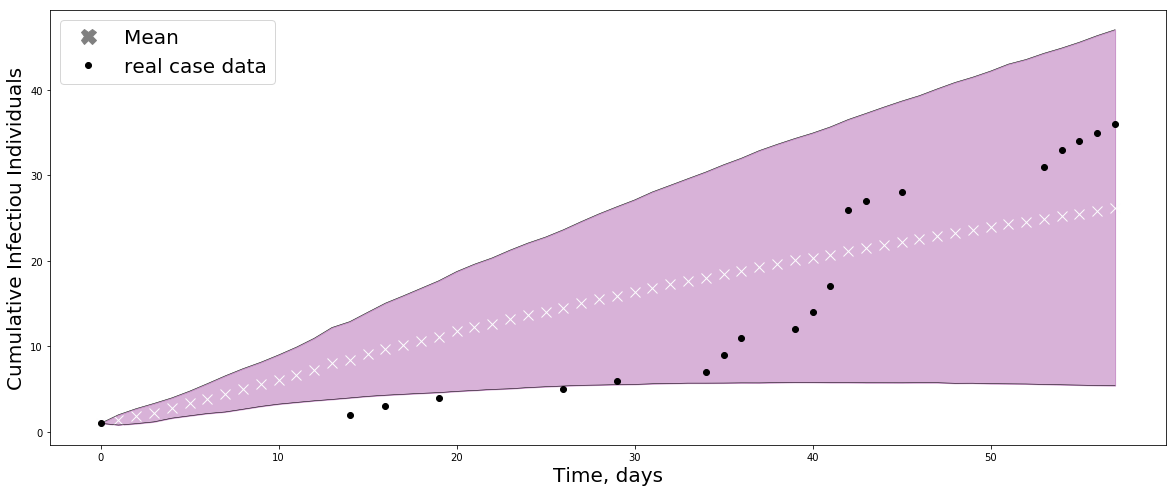

In [187]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(range(58), np.mean(mat, axis = 0), 'x', markersize = 10,linewidth = 6, color = '#fdfdfe', label = 'Mean')
plt.plot(range(58), (np.mean(mat, axis = 0)+np.std(mat, axis = 0)), color ='k', lw=0.5)
plt.plot(range(58), np.maximum((np.mean(mat, axis = 0)-np.std(mat, axis = 0)),0),color ='k', lw=0.5)
plt.fill_between(range(58),  (np.mean(mat, axis = 0)+np.std(mat, axis = 0)), np.maximum((np.mean(mat, axis = 0)-np.std(mat, axis = 0)),0), 1, alpha=0.3, color = 'purple')
true, = ax.plot(summary_time, summary_cum, 'o', color = 'black', label = 'real case data')
# leg = ax.legend(fontsize = 20)
plt.ylabel('Cumulative Infectiou Individuals', fontsize = 20)
plt.xlabel('Time, days', fontsize = 20)

blue_line = mlines.Line2D([], [], color='grey', marker='X',
                          markersize=15, linestyle = '', linewidth = 2,  label='Mean')
plt.legend(handles=[blue_line, true], fontsize = 20)
# leg.legendHandles[0].set_color('red')
# LH = leg.legendHandles
# LH[0].set_color('red')  # Works
# LH[0].set_linewidth(18)
# LH[1].set_color('y') # No change


In [152]:
leg.legendHandles[0]

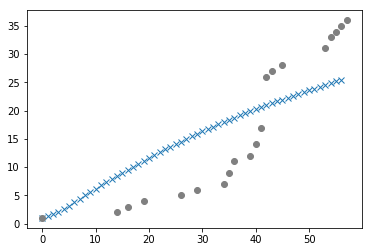

In [69]:
plt.plot(range(57), sun_cum/200, 'x')
plt.plot(summary_time, summary_cum, 'o', color = 'grey')
